In [798]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import timedelta
plt.style.use('fivethirtyeight')
users = pd.read_csv('takehome_users.csv')
engage = pd.read_csv('takehome_user_engagement.csv')
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [799]:
users.shape

(12000, 10)

In [800]:
users['invited_by_user_id'].fillna('0',inplace=True)
users.invited_by_user_id = users.invited_by_user_id .astype(int)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 937.6+ KB


In [801]:
users.shape

(12000, 10)

In [802]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240


In [803]:
percent_missing = users.isnull().sum() * 100 / len(users) 
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}) 
df=missing_value_df[missing_value_df['percent_missing']!=0]
df=df.sort_values('percent_missing',ascending=False)
df

,percent_missing
last_session_creation_time,26.475


In [804]:
users['creation_time'] = pd.to_datetime(
    users['creation_time'], format='%Y-%m-%d %H:%M:%S')
users['last_session_creation_time'] = pd.to_datetime(
    users['last_session_creation_time'], unit='s')
users['last_session_creation_time'].fillna(users['creation_time'],inplace=True)


In [805]:
percent_missing = users.isnull().sum() * 100 / len(users) 
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}) 
df1=missing_value_df[missing_value_df['percent_missing']!=0]
df1=df.sort_values('percent_missing',ascending=False)
df1

,percent_missing
last_session_creation_time,26.475


In [806]:
# calculate user history
users['history'] = users['last_session_creation_time'] - users['creation_time']
users['history'] = users['history'].dt.days
# calculate account age
users['account_age'] = max(users['creation_time']) - users['creation_time']
users['account_age'] = users['account_age'].dt.days
# drop the two original columns
users = users.drop(['creation_time', 'last_session_creation_time'], axis=1)

In [807]:
engage['time_stamp'] = pd.to_datetime(engage['time_stamp'])
engage = engage.set_index(pd.DatetimeIndex(engage['time_stamp']))
grouped = engage.groupby('user_id').resample('1W').sum()

In [808]:
grouped.head(20)

user_id  visited
user_id time_stamp                  
1       2014-04-27        1        1
2       2013-11-17        2        1
        2013-11-24        0        0
        2013-12-01        2        1
        2013-12-08        0        0
        2013-12-15        2        1
        2013-12-22        0        0
        2013-12-29        2        1
        2014-01-05        2        1
        2014-01-12        2        1
        2014-01-19        0        0
        2014-01-26        0        0
        2014-02-02        0        0
        2014-02-09        6        3
        2014-02-16        4        2
        2014-02-23        0        0
        2014-03-02        0        0
        2014-03-09        2        1
        2014-03-16        2        1
        2014-03-23        0        0

In [809]:
grouped99 = grouped[grouped['user_id']!=0]

In [810]:
df9=grouped99.droplevel(level=0)

In [811]:
df9 = df9.sort_values(by=['user_id'])

In [812]:
df9['active'] = df9['visited'].apply(lambda x: 1 if x>=3 else 0)

In [813]:
df9['active_week']=df9.groupby('user_id').active.transform('sum')

In [814]:
df9['adopt'] = df9['active_week'].apply(lambda x: 1 if x>=1 else 0)

In [815]:
df91=df9.reset_index()

In [816]:
df92=df91.drop(columns=['time_stamp','visited','active','active_week'])

In [817]:
df92=df92.drop_duplicates()

In [818]:
df=pd.DataFrame(df92)

In [819]:
df=df.set_index('user_id')

In [820]:
df.head(10)

,adopt
user_id,
1,0
2,0
3,0
4,0
5,0
6,1
7,0
10,0
11,0


In [821]:
users = users.rename(columns={'object_id': 'user_id'})
users = users.set_index('user_id')
users.head(10)

,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age
user_id,,,,,,,,,
1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803,0,38
2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316,136,196
3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525,0,437
4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151,1,374
5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240,5,498
6,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,0,0,197,11241,2,164
7,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,0,1,37,0,4,530
8,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1,1,74,0,0,303
9,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,0,0,302,0,0,206


In [822]:
data = pd.concat([users, df], axis=1, join='inner')
#data['adopted_user'] = data['adopted_user'].astype(int)

In [823]:
data=data.drop(columns=['name','email','org_id','invited_by_user_id'])

In [824]:
data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,history,account_age,adopt
user_id,,,,,,
1,GUEST_INVITE,1,0,0,38,0
2,ORG_INVITE,0,0,136,196,0
3,ORG_INVITE,0,0,0,437,0
4,GUEST_INVITE,0,0,1,374,0
5,GUEST_INVITE,0,0,5,498,0


In [825]:
percent_missing = data.isnull().sum() * 100 / len(data) 
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}) 
df=missing_value_df[missing_value_df['percent_missing']!=0]
df=df.sort_values('percent_missing',ascending=False)
df

,percent_missing


array([[<AxesSubplot:title={'center':'history'}>,
        <AxesSubplot:title={'center':'account_age'}>]], dtype=object)

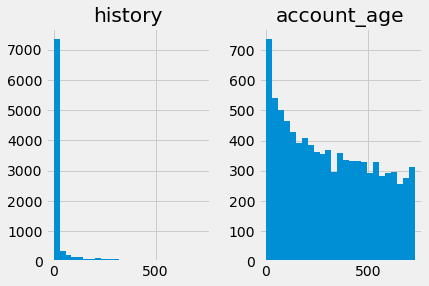

In [826]:
df11=data[['history','account_age']]
df11.hist(bins = 25)

In [827]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df12=sc.fit_transform(df11)

In [828]:
df12 = pd.DataFrame(df12, index=df11.index, columns=df11.columns)

array([[<AxesSubplot:title={'center':'history'}>,
        <AxesSubplot:title={'center':'account_age'}>]], dtype=object)

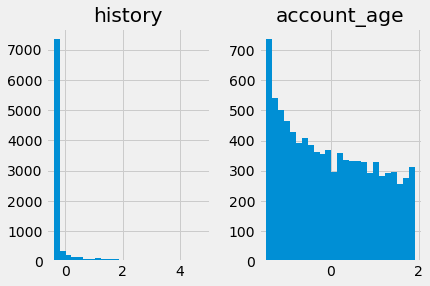

In [829]:
df12.hist(bins = 25)

In [830]:
data['history']=df12['history']
data['account_age']=df12['account_age']

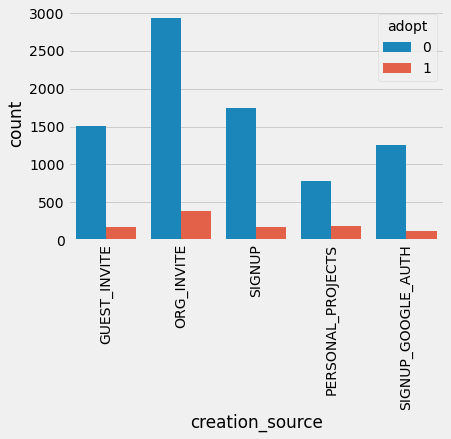

In [831]:
# Creation source and adopted user
_ = sns.countplot(x='creation_source', data=data, hue='adopt')
_ = plt.xticks(rotation=90)

In [832]:
# doesn't look like there was much difference among creation sources
# let's do a chi2 test
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(data['creation_source'], data['adopt'])
results = chi2_contingency(crosstab)
print('chi2 = {}\tp = {}'.format(results[0], results[1]))


chi2 = 93.63383117481516	p = 2.224607818995515e-19


In [833]:
# hmm, chi2 test significant, but how much was the difference
data.groupby('creation_source')['adopt'].apply(lambda x: sum(x)/len(x))

creation_source
GUEST_INVITE          0.107610
ORG_INVITE            0.115872
PERSONAL_PROJECTS     0.198764
SIGNUP                0.088866
SIGNUP_GOOGLE_AUTH    0.085445
Name: adopt, dtype: float64

In [834]:
# check mailing list and marketing drip
data.groupby('opted_in_to_mailing_list')['adopt'].apply(lambda x: sum(x)/len(x))

opted_in_to_mailing_list
0    0.114643
1    0.107839
Name: adopt, dtype: float64

In [835]:
def z_test(df, col, target='adopt'):
    from statsmodels.stats.weightstats import CompareMeans
    opted_in = df.loc[data[col]==1, target]
    opted_out = df.loc[data[col]==0, target]
    z_data = CompareMeans.from_data(opted_in, opted_out)
    z, p = CompareMeans.ztest_ind(z_data)
    print('For {}, z = {}, p = {}'.format(col, z, p))
z_test(data, 'opted_in_to_mailing_list')

For opted_in_to_mailing_list, z = -0.8949245112288948, p = 0.3708274429179982


In [836]:
data.groupby('enabled_for_marketing_drip')['adopt'].apply(lambda x: sum(x)/len(x))

enabled_for_marketing_drip
0    0.114969
1    0.101574
Name: adopt, dtype: float64

In [837]:
z_test(data, 'enabled_for_marketing_drip')

For enabled_for_marketing_drip, z = -1.4580017564927052, p = 0.14484005886356457


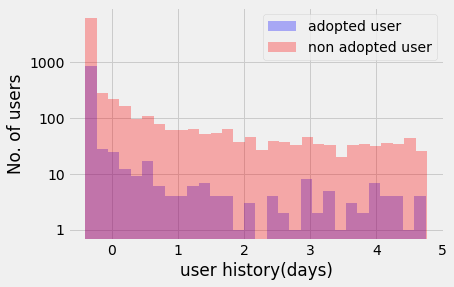

In [838]:
# history and adopted user
def plot_hist_days(df, col, xlabel):
    _ = plt.hist(df.loc[data['adopt']==1, col], 
                 bins=30, alpha=0.3, color='b', label='adopted user')
    _ = plt.hist(df.loc[data['adopt']==0, col], 
                 bins=30, alpha=0.3, color='r', label='non adopted user')
    _ = plt.yscale('log')
    _ = plt.legend()
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('No. of users')
    _ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])
plot_hist_days(data, 'history', 'user history(days)')

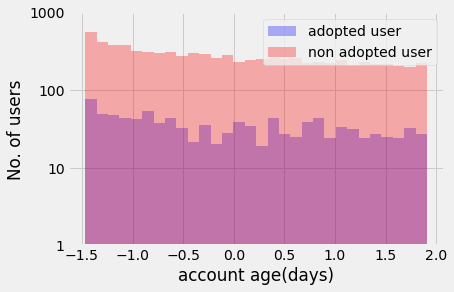

In [839]:
plot_hist_days(data, 'account_age', 'account age(days)')

In [840]:
# make dummy variable for creation source
creation_source = pd.get_dummies(data['creation_source'], drop_first=True)
model_data = pd.concat([data, creation_source], axis=1).drop('creation_source', axis=1)
y = model_data['adopt']
X = model_data.drop('adopt', axis=1)
# though account_age and history have different scales than other features,
# I plan to use random forest model, which is not affectd by the different scales
# no need to scale the data
# create training and testing sets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, stratify=y, random_state=42)

In [841]:
# use random forest model with balanced class weights to correct for imbalance in the data
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# use CV to tune number of trees
params = {'n_estimators': [10, 50, 100, 200]}
model = GridSearchCV(clf, params)
model.fit(Xtrain, ytrain)
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

Best parameters were {'n_estimators': 10}
Best average precision was 0.8393088552915767


In [842]:
# evluation of the model
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(
    random_state=42, class_weight='balanced', n_estimators=100
)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy of test set was', accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy of test set was 0.8281519861830743
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2054
           1       0.16      0.13      0.14       262

    accuracy                           0.83      2316
   macro avg       0.53      0.52      0.52      2316
weighted avg       0.81      0.83      0.82      2316



In [843]:
# take a look at feature importance
imp = pd.Series(model.feature_importances_, index=X.columns)
imp = imp.sort_values(ascending=False)
print(imp)

account_age                   0.700101
history                       0.221408
PERSONAL_PROJECTS             0.018126
opted_in_to_mailing_list      0.014577
SIGNUP_GOOGLE_AUTH            0.013462
enabled_for_marketing_drip    0.013019
ORG_INVITE                    0.010902
SIGNUP                        0.008406
dtype: float64


In [786]:
model_data.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age,adopt,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
user_id,,,,,,,,,,,
1,1,0,11,10803,0,38,0,0,0,0,0
2,0,0,1,316,136,196,0,1,0,0,0
3,0,0,94,1525,0,437,0,1,0,0,0
4,0,0,1,5151,1,374,0,0,0,0,0
5,0,0,193,5240,5,498,0,0,0,0,0
